#### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

#### Load and Explore the Dataset

In [4]:
# Load the dataset
df = pd.read_csv('heart_disease_data.csv')

# Basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nTarget Distribution:")
print(df['target'].value_counts())

Dataset Shape: (303, 14)

First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-nul

#### Data Visualization and Analysis

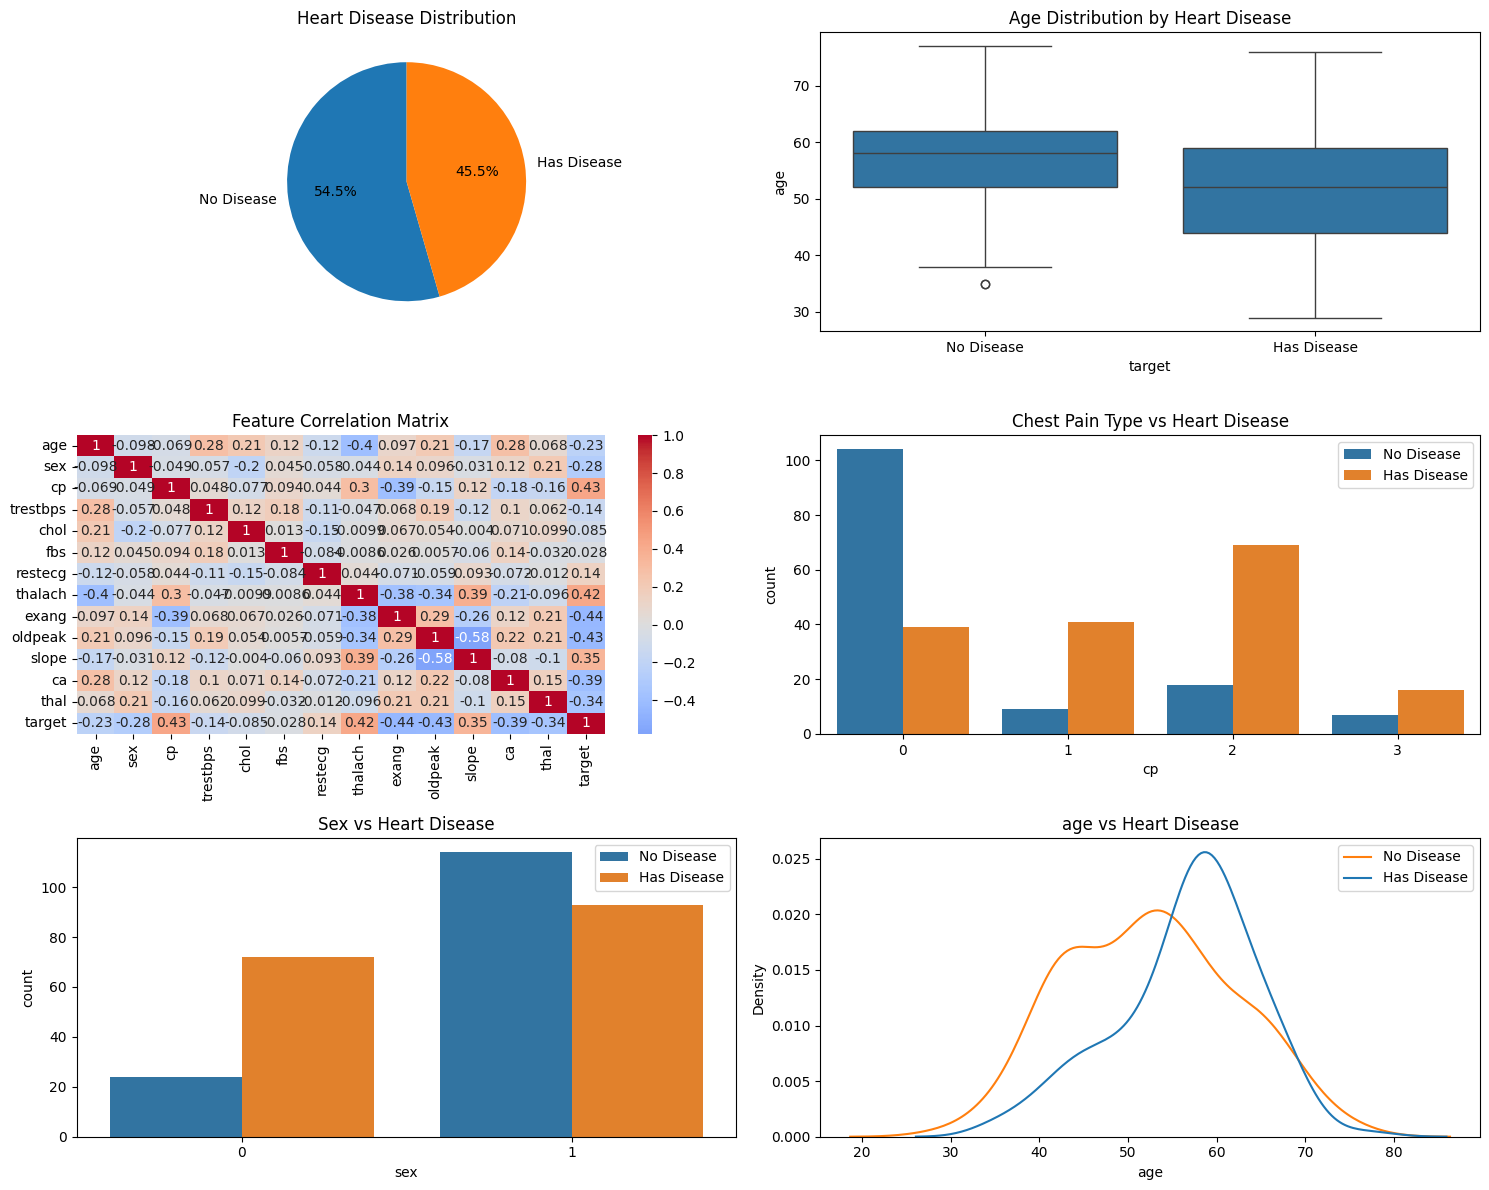

In [9]:
# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# 1. Target distribution
axes[0,0].pie(df['target'].value_counts().values, 
              labels=['No Disease', 'Has Disease'], 
              autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Heart Disease Distribution')

# 2. Age distribution by target
sns.boxplot(data=df, x='target', y='age', ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Heart Disease')
axes[0,1].set_xticklabels(['No Disease', 'Has Disease'])

# 3. Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
            center=0, ax=axes[1,0])
axes[1,0].set_title('Feature Correlation Matrix')

# 4. Chest pain type distribution
sns.countplot(data=df, x='cp', hue='target', ax=axes[1,1])
axes[1,1].set_title('Chest Pain Type vs Heart Disease')
axes[1,1].legend(['No Disease', 'Has Disease'])

# 4. Sex distribution
sns.countplot(data=df, x='sex', hue='target', ax=axes[2,0])
axes[2,0].set_title('Sex vs Heart Disease')
axes[2,0].legend(['No Disease', 'Has Disease'])

# 4. age distribution
sns.kdeplot(data=df, x='age', hue='target', ax=axes[2,1])
axes[2,1].set_title('age vs Heart Disease')
axes[2,1].legend(['No Disease', 'Has Disease'])


plt.tight_layout()
plt.show()

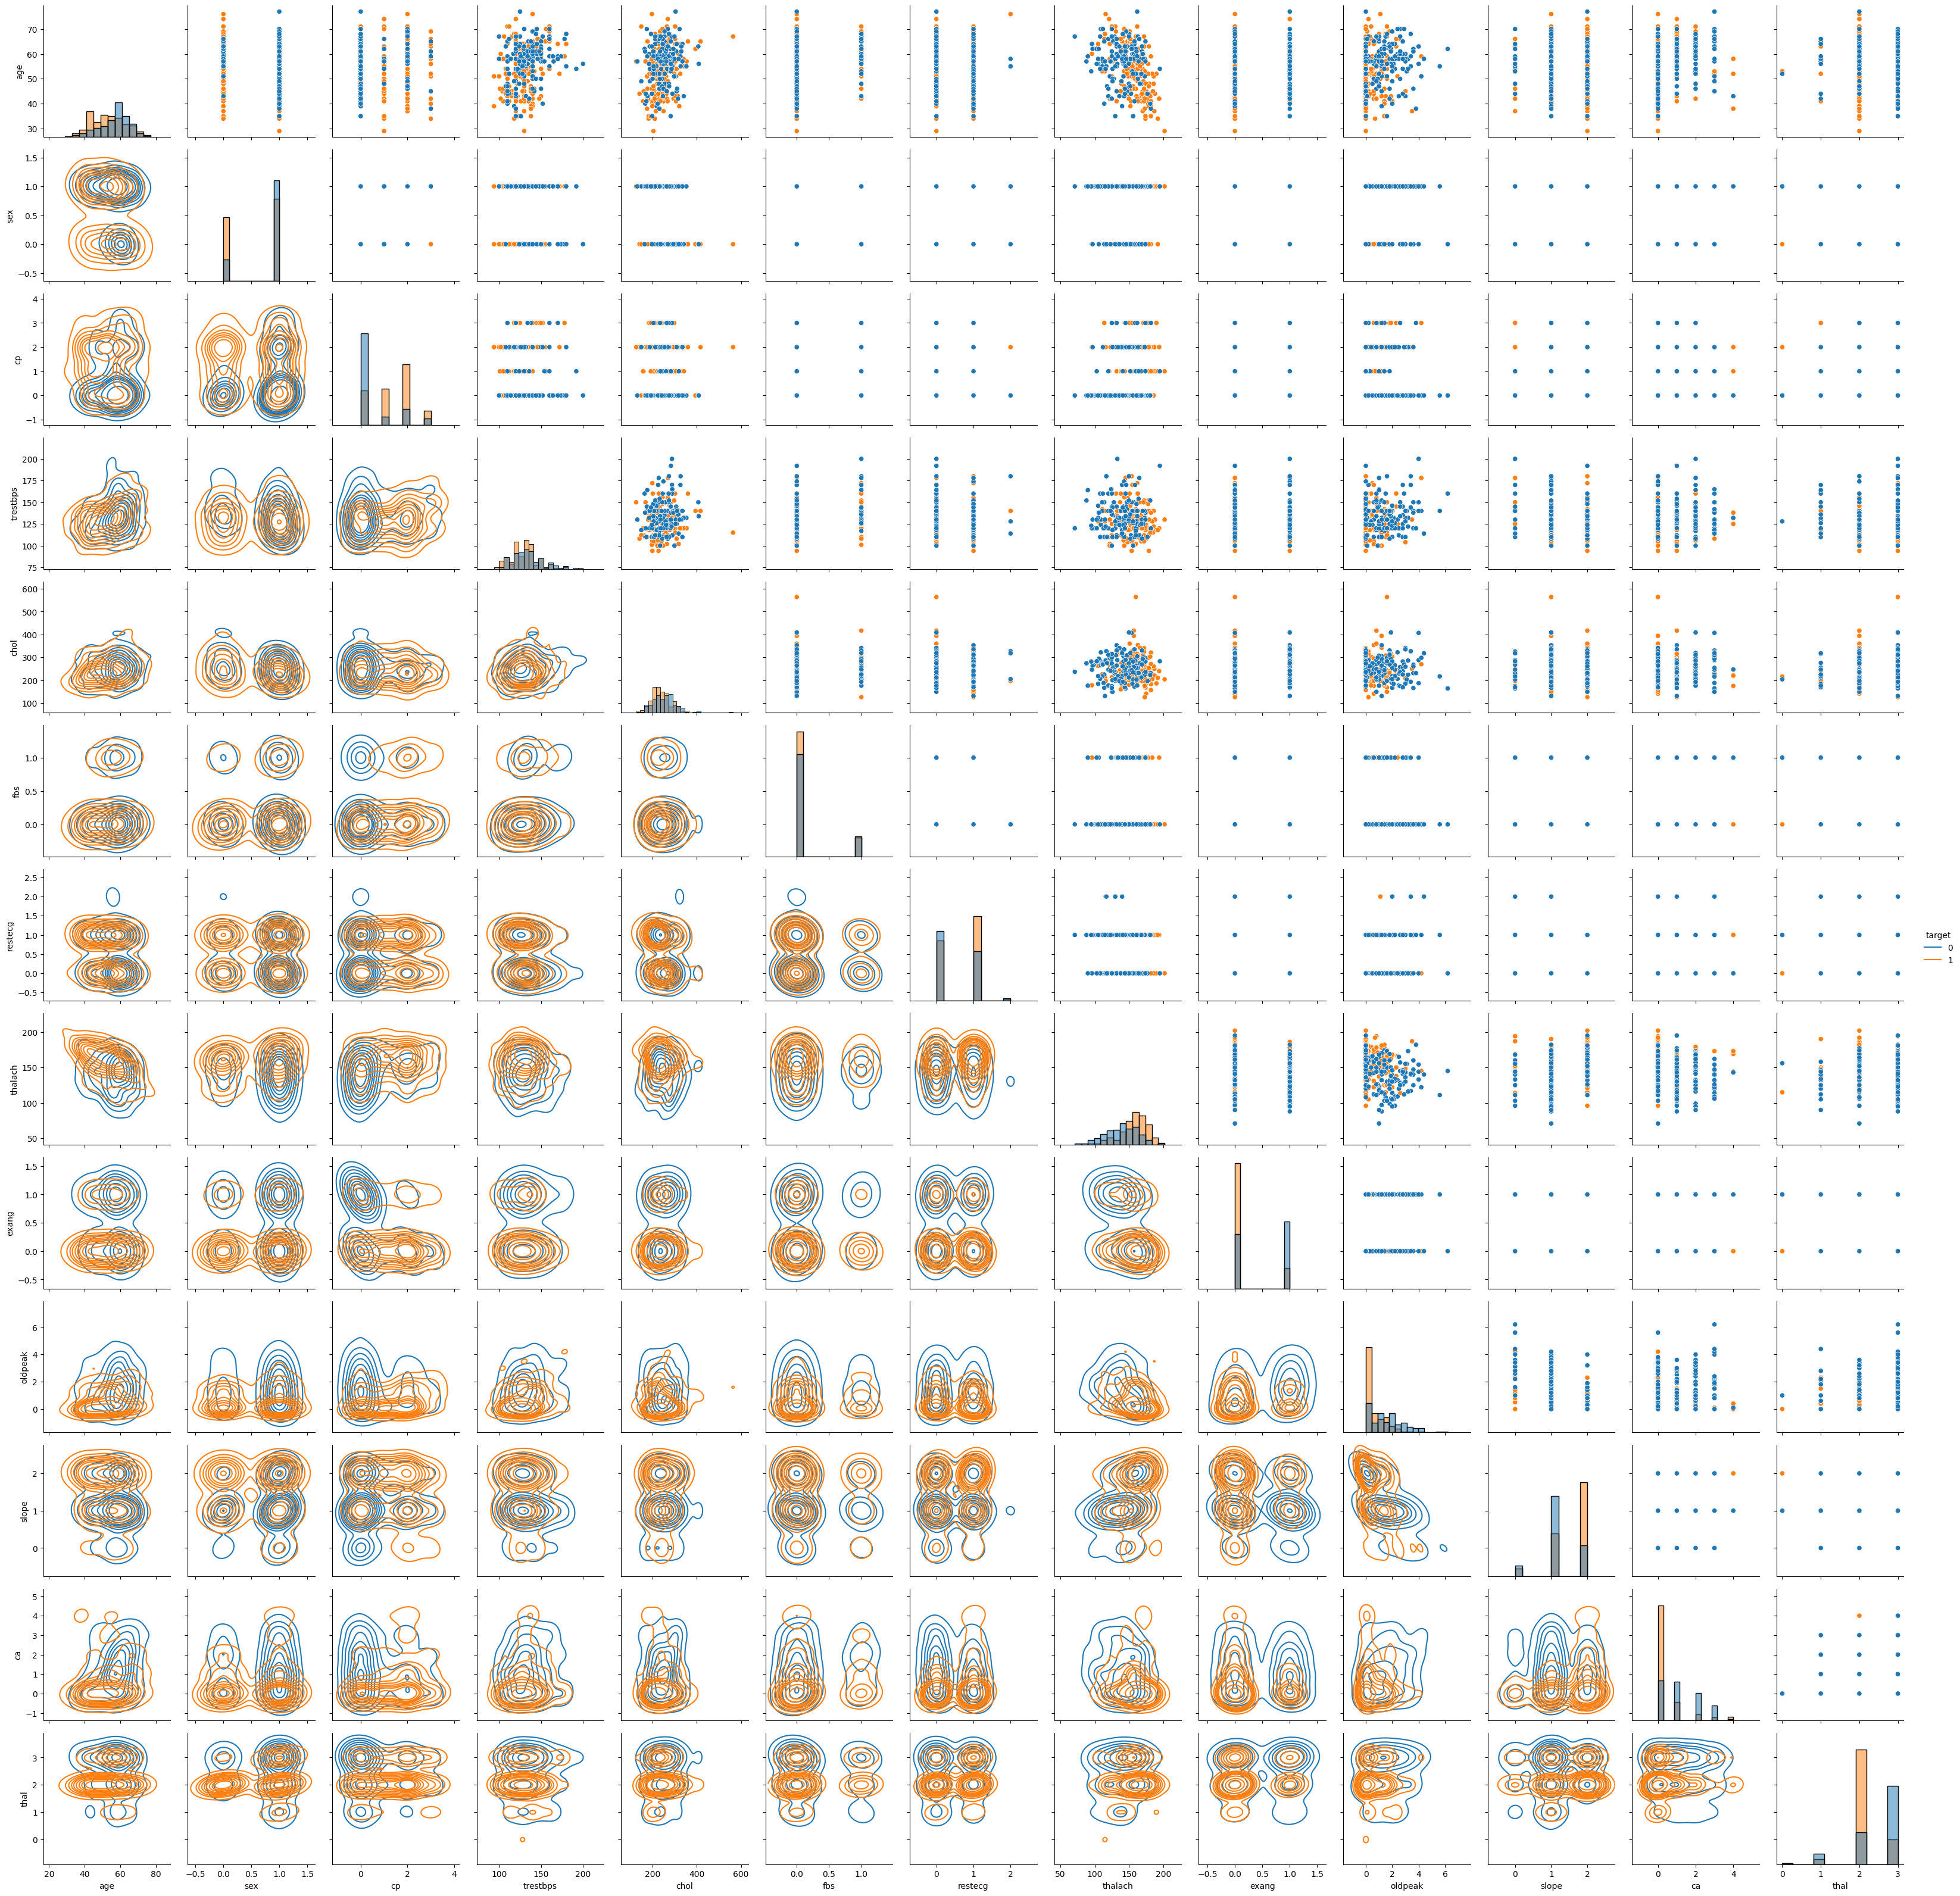

In [10]:
# Pairwise relationships
g = sns.PairGrid(df, hue='target')
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.add_legend()
plt.show()

#### Data Preprocessing

In [11]:
# Separate features and target
X = df.drop('target', axis=1)  # All columns except 'target'
y = df['target']               # Only the 'target' column

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# Scale the features (very important for neural networks!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeature scaling completed!")
print("Training features mean:", np.mean(X_train_scaled, axis=0).round(3))
print("Training features std:", np.std(X_train_scaled, axis=0).round(3))

Features shape: (303, 13)
Target shape: (303,)

Training set: 242 samples
Testing set: 61 samples

Feature scaling completed!
Training features mean: [ 0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0.  0.  0.]
Training features std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


####  Build the Neural Network Architecture

In [12]:
# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Build the neural network model
model = keras.Sequential([
    # Input layer (automatically inferred from first Dense layer)
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),  # Regularization to prevent overfitting
    
    # Hidden layer 1
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    
    # Hidden layer 2
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    
    # Output layer
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Display model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile the Model

In [13]:
# Compile the model
model.compile(
    optimizer='adam',           # Adaptive learning rate optimizer
    loss='binary_crossentropy', # Loss function for binary classification
    metrics=['accuracy']        # Track accuracy during training
)

print("Model compiled successfully!")

Model compiled successfully!


#### Train the Model

In [14]:
# Set up early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Watch validation loss
    patience=15,         # Stop if no improvement for 15 epochs
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,              # Maximum number of training rounds
    batch_size=32,           # Number of samples processed at once
    validation_split=0.2,    # Use 20% of training data for validation
    callbacks=[early_stopping],
    verbose=1
)

print("\nTraining completed!")

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.5213 - loss: 0.7082 - val_accuracy: 0.6531 - val_loss: 0.6754
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5160 - loss: 0.6940 - val_accuracy: 0.6939 - val_loss: 0.6528
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5896 - loss: 0.6743 - val_accuracy: 0.7755 - val_loss: 0.6334
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6632 - loss: 0.6464 - val_accuracy: 0.8163 - val_loss: 0.6141
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6679 - loss: 0.6357 - val_accuracy: 0.8163 - val_loss: 0.5968
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6708 - loss: 0.6304 - val_accuracy: 0.8367 - val_loss: 0.5793
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7169 - loss: 0.6154 - val_accuracy: 0.8367 - val_loss: 0.5588
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7219 - loss: 0.5913 - val_accuracy: 0.8571 - val_loss:

#### Visualize Training Progress

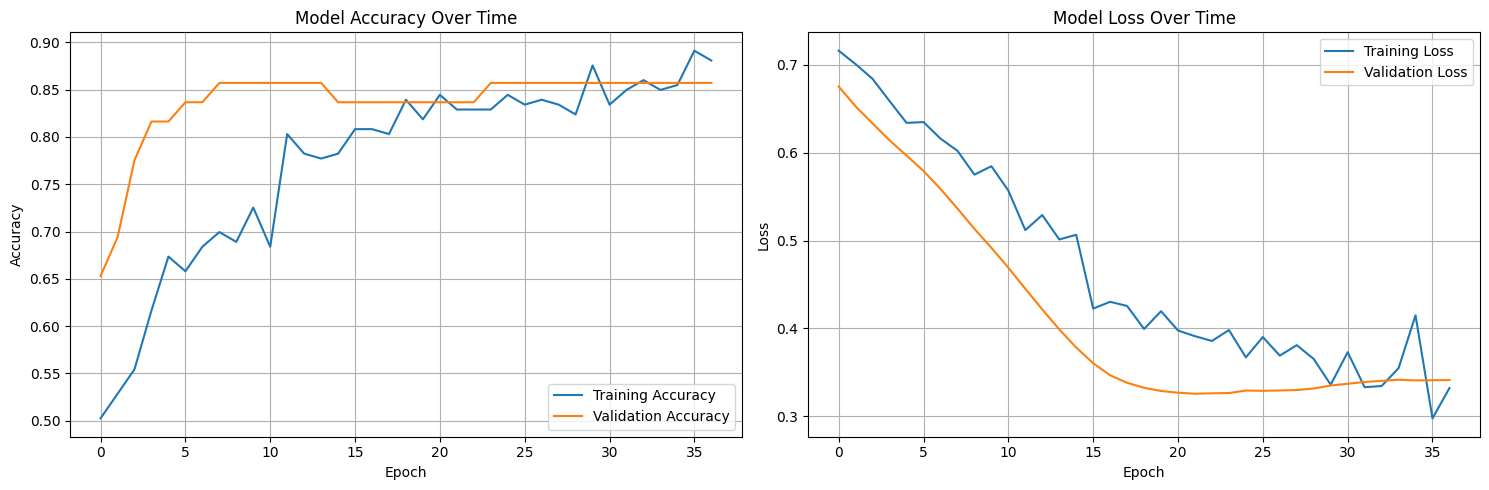

In [15]:
# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot training & validation accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy Over Time')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plot training & validation loss
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss Over Time')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

#### Evaluate the Model

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step 
Test Accuracy: 0.8033 (80.33%)

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.90      0.64      0.75        28
 Has Disease       0.76      0.94      0.84        33

    accuracy                           0.80        61
   macro avg       0.83      0.79      0.79        61
weighted avg       0.82      0.80      0.80        61



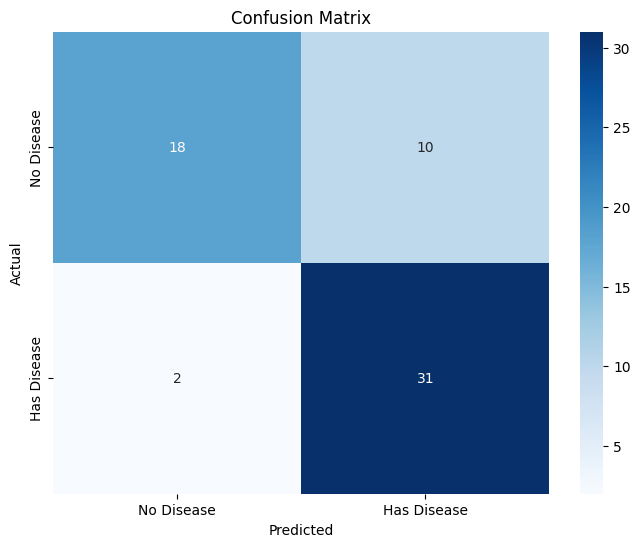


Confusion Matrix Breakdown:
True Negatives (Correctly predicted no disease): 18
False Positives (Incorrectly predicted disease): 10
False Negatives (Missed disease cases): 2
True Positives (Correctly predicted disease): 31


In [16]:
# Make predictions on test data
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, 
                          target_names=['No Disease', 'Has Disease']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Has Disease'],
            yticklabels=['No Disease', 'Has Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"\nConfusion Matrix Breakdown:")
print(f"True Negatives (Correctly predicted no disease): {cm[0,0]}")
print(f"False Positives (Incorrectly predicted disease): {cm[0,1]}")
print(f"False Negatives (Missed disease cases): {cm[1,0]}")
print(f"True Positives (Correctly predicted disease): {cm[1,1]}")

#### Make Predictions on New Data

In [17]:
# Function to predict for new patient data
def predict_heart_disease(patient_data, model, scaler):
    """
    Predict heart disease for a new patient
    
    patient_data: list or array with 13 features in correct order
    """
    # Convert to numpy array and reshape
    patient_data = np.array(patient_data).reshape(1, -1)
    
    # Scale the data using the same scaler used for training
    patient_data_scaled = scaler.transform(patient_data)
    
    # Make prediction
    probability = model.predict(patient_data_scaled)[0][0]
    prediction = int(probability > 0.5)
    
    return prediction, probability

# Example: Predict for a new patient
# [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
new_patient = [63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]

prediction, probability = predict_heart_disease(new_patient, model, scaler)

print(f"New Patient Prediction:")
print(f"Probability of heart disease: {probability:.4f} ({probability*100:.2f}%)")
print(f"Prediction: {'Has Heart Disease' if prediction == 1 else 'No Heart Disease'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
New Patient Prediction:
Probability of heart disease: 0.8735 (87.35%)
Prediction: Has Heart Disease


#### Save the Model

In [18]:
# Save the trained model
model.save('heart_disease_model.h5')
print("Model saved as 'heart_disease_model.h5'")

# Save the scaler
import joblib
joblib.dump(scaler, 'heart_disease_scaler.pkl')
print("Scaler saved as 'heart_disease_scaler.pkl'")

# To load later:
# loaded_model = keras.models.load_model('heart_disease_model.h5')
# loaded_scaler = joblib.load('heart_disease_scaler.pkl')

Model saved as 'heart_disease_model.h5'
Scaler saved as 'heart_disease_scaler.pkl'


#### Loading and Testing Saved Heart Disease Model

In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


In [21]:
df = pd.read_csv('heart_disease_data.csv')

In [22]:
# Load the trained model
try:
    loaded_model = keras.models.load_model('heart_disease_model.h5')
    print(" Model loaded successfully!")
    
    # Display model architecture
    print("\nLoaded Model Architecture:")
    loaded_model.summary()
    
except FileNotFoundError:
    print("Model file 'heart_disease_model.h5' not found!")
    print("Make sure you've trained and saved the model first.")
    
except Exception as e:
    print(f"Error loading model: {e}")

# Load the scaler
try:
    loaded_scaler = joblib.load('heart_disease_scaler.pkl')
    print("Scaler loaded successfully!")
    
except FileNotFoundError:
    print("Scaler file 'heart_disease_scaler.pkl' not found!")
    print("Make sure you've saved the scaler during training.")
    
except Exception as e:
    print(f"Error loading scaler: {e}")

 Model loaded successfully!

Loaded Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,523 (13.77 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Scaler loaded successfully!


In [23]:
X = df.drop('target', axis=1)
y = df['target']

In [24]:
# Function to get random samples from the dataset
def get_random_samples(df, n_samples=10):
    """
    Get n random samples from the dataset
    Returns: DataFrame with samples and their details
    """
    random_indices = np.random.choice(df.index, size=n_samples, replace=False)
    random_samples = df.loc[random_indices].copy()
    return random_samples, random_indices

# Get 10 random samples
n_test_samples = 10
random_samples, sample_indices = get_random_samples(df, n_test_samples)

print(f"Selected {n_test_samples} random samples:")
print(f"Sample indices: {sample_indices}")
print("\nRandom samples:")
print(random_samples)

# Separate features and actual targets for these samples
X_random = random_samples.drop('target', axis=1)
y_actual = random_samples['target']

print(f"\nActual targets for random samples: {list(y_actual.values)}")

Selected 10 random samples:
Sample indices: [179 228 111 246  60   9 119 223 268  33]

Random samples:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
179   57    1   0       150   276    0        0      112      1      0.6   
228   59    1   3       170   288    0        0      159      0      0.2   
111   57    1   2       150   126    1        1      173      0      0.2   
246   56    0   0       134   409    0        0      150      1      1.9   
60    71    0   2       110   265    1        0      130      0      0.0   
9     57    1   2       150   168    0        1      174      0      1.6   
119   46    0   0       138   243    0        0      152      1      0.0   
223   56    0   0       200   288    1        0      133      1      4.0   
268   54    1   0       122   286    0        0      116      1      3.2   
33    54    1   2       125   273    0        0      152      0      0.5   

     slope  ca  thal  target  
179      1   1     1       0 

In [25]:
# Scale the random samples using the loaded scaler
X_random_scaled = loaded_scaler.transform(X_random)

print("Random samples scaled successfully!")
print(f"Scaled features shape: {X_random_scaled.shape}")

# Make predictions
predictions_prob = loaded_model.predict(X_random_scaled)
predictions_binary = (predictions_prob > 0.5).astype(int).flatten()

print(f"\nPrediction probabilities: {predictions_prob.flatten()}")
print(f"Binary predictions: {predictions_binary}")
print(f"Actual targets: {y_actual.values}")

Random samples scaled successfully!
Scaled features shape: (10, 13)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step

Prediction probabilities: [0.33235517 0.67271805 0.97100055 0.05227805 0.9362757  0.9319706
 0.7070952  0.03192435 0.04447716 0.61201847]
Binary predictions: [0 1 1 0 1 1 1 0 0 1]
Actual targets: [0 0 1 0 1 1 1 0 0 1]


In [27]:
# Calculate accuracy on random samples
accuracy = accuracy_score(y_actual, predictions_binary)
print(f"\nAccuracy on random samples: {accuracy:.3f} ({accuracy*100:.1f}%)")

# Count correct and incorrect predictions
correct_predictions = sum(y_actual == predictions_binary)
total_predictions = len(y_actual)

print(f"Correct predictions: {correct_predictions}/{total_predictions}")

# Analyze by prediction type
true_positives = sum((y_actual == 1) & (predictions_binary == 1))
true_negatives = sum((y_actual == 0) & (predictions_binary == 0))
false_positives = sum((y_actual == 0) & (predictions_binary == 1))
false_negatives = sum((y_actual == 1) & (predictions_binary == 0))

print(f"\nPrediction Breakdown:")
print(f"True Positives (Correctly identified disease): {true_positives}")
print(f"True Negatives (Correctly identified no disease): {true_negatives}")
print(f"False Positives (Incorrectly predicted disease): {false_positives}")
print(f"False Negatives (Missed disease cases): {false_negatives}")


Accuracy on random samples: 0.900 (90.0%)
Correct predictions: 9/10

Prediction Breakdown:
True Positives (Correctly identified disease): 5
True Negatives (Correctly identified no disease): 4
False Positives (Incorrectly predicted disease): 1
False Negatives (Missed disease cases): 0


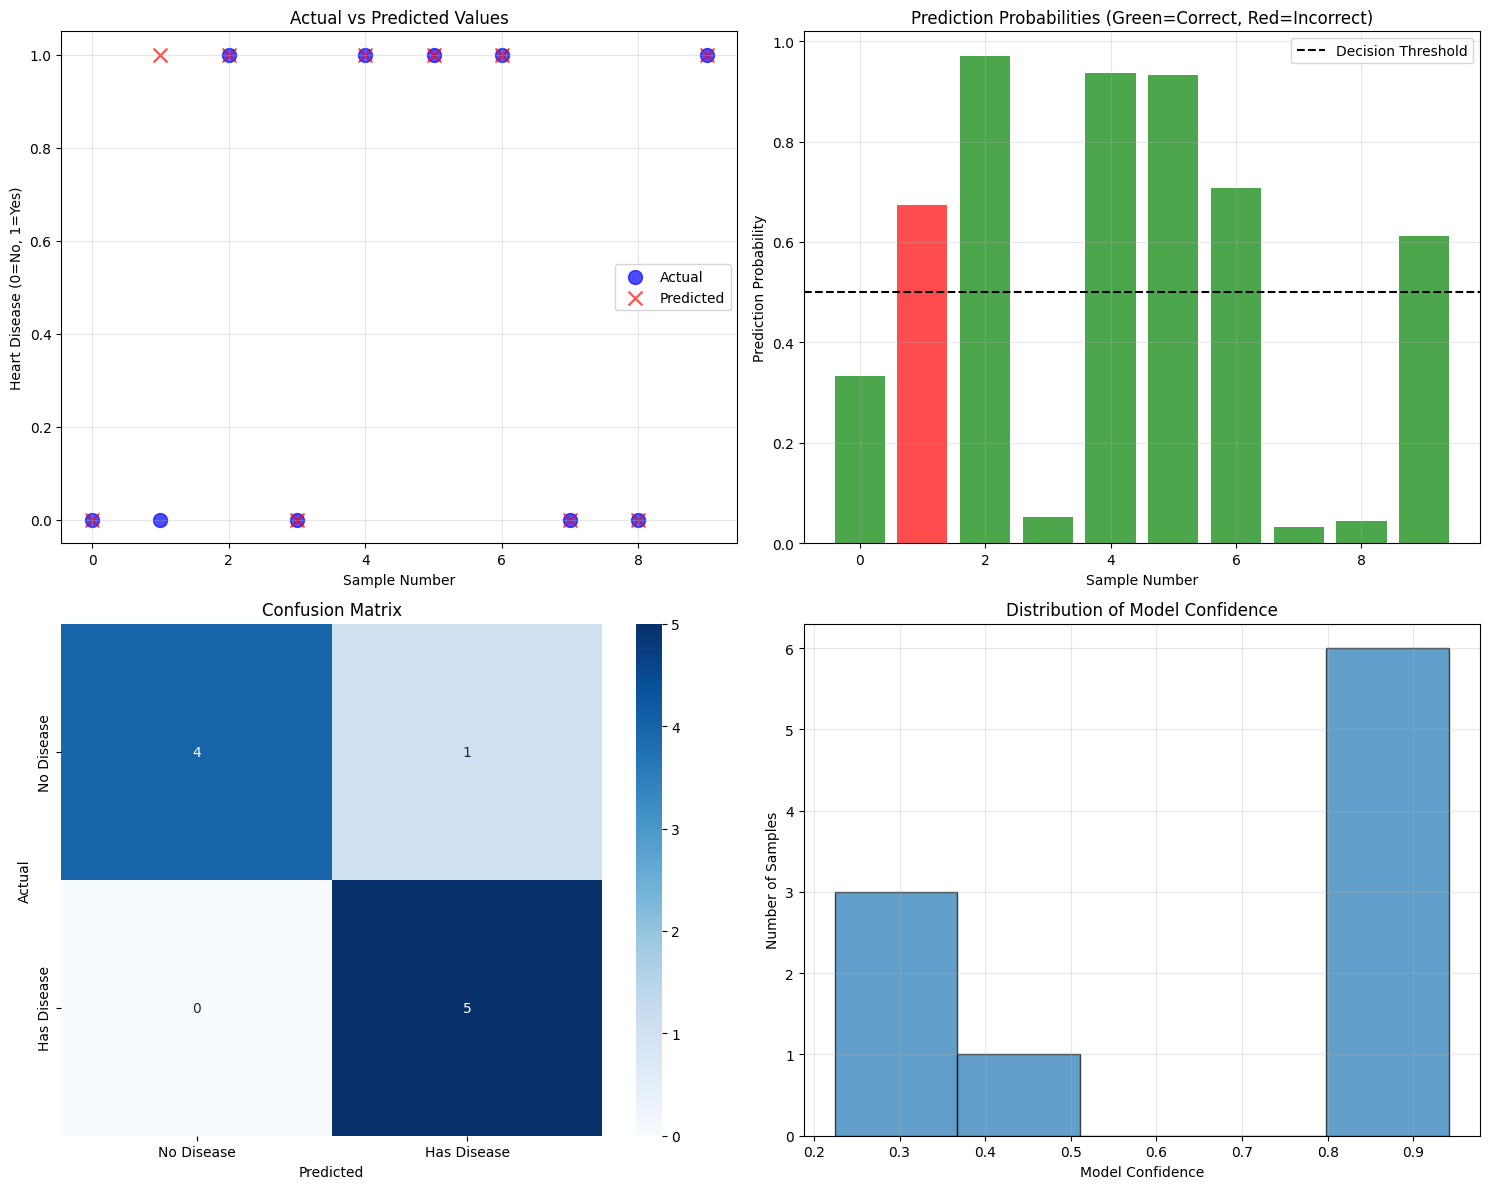

In [28]:
# Create visualization of results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Prediction vs Actual
axes[0,0].scatter(range(len(y_actual)), y_actual, alpha=0.7, label='Actual', color='blue', s=100)
axes[0,0].scatter(range(len(predictions_binary)), predictions_binary, alpha=0.7, label='Predicted', color='red', s=100, marker='x')
axes[0,0].set_xlabel('Sample Number')
axes[0,0].set_ylabel('Heart Disease (0=No, 1=Yes)')
axes[0,0].set_title('Actual vs Predicted Values')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Prediction Probabilities
colors = ['green' if correct else 'red' for correct in (y_actual == predictions_binary)]
bars = axes[0,1].bar(range(len(predictions_prob)), predictions_prob.flatten(), color=colors, alpha=0.7)
axes[0,1].axhline(y=0.5, color='black', linestyle='--', label='Decision Threshold')
axes[0,1].set_xlabel('Sample Number')
axes[0,1].set_ylabel('Prediction Probability')
axes[0,1].set_title('Prediction Probabilities (Green=Correct, Red=Incorrect)')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Confusion Matrix (if we have both classes)
if len(set(y_actual)) > 1 and len(set(predictions_binary)) > 1:
    cm = confusion_matrix(y_actual, predictions_binary)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1,0],
                xticklabels=['No Disease', 'Has Disease'],
                yticklabels=['No Disease', 'Has Disease'])
    axes[1,0].set_title('Confusion Matrix')
    axes[1,0].set_xlabel('Predicted')
    axes[1,0].set_ylabel('Actual')
else:
    axes[1,0].text(0.5, 0.5, 'Not enough variety in\nsamples for confusion matrix', 
                   ha='center', va='center', transform=axes[1,0].transAxes)
    axes[1,0].set_title('Confusion Matrix')

# 4. Confidence Distribution
axes[1,1].hist(results_df['Confidence'], bins=5, alpha=0.7, edgecolor='black')
axes[1,1].set_xlabel('Model Confidence')
axes[1,1].set_ylabel('Number of Samples')
axes[1,1].set_title('Distribution of Model Confidence')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()